# MNIST dataset

-  [Introduction](#intro)

## Introduction <a id = "intro"></a>

MINST dataset files can be downloaded from [The MINST Database](http://yann.lecun.com/exdb/mnist/)

The MNIST dataset was constructed from two datasets of the US __National Institute of Standards and Technology__ (NIST). The training set consists of handwritten digits from 250 different people, 50 percent high school students, and 50 percent employees from the Census Bureau. Note that the test set contains handwritten digits from different people following the same split.

The MNIST dataset contains 60,000 training images and 10,000 test images.

In this notebook we will look at how to read the MNIST dataset efficiently into memory.

## File Format of the MNIST Database
The data is stored in a very simple file format designed for storing vectors and multidimensional matrices.

All the integers in the files are stored in the MSB first (high endian) format used by most non-Intel processors. Users of Intel processors and other low-endian machines must flip the bytes of the header.

There are 4 files:

- train-images-idx3-ubyte: training set images
- train-labels-idx1-ubyte: training set labels
- t10k-images-idx3-ubyte:  test set images
- t10k-labels-idx1-ubyte:  test set labels

The training set contains 60000 examples, and the test set 10000 examples.

The first 5000 examples of the test set are taken from the original NIST training set. The last 5000 are taken from the original NIST test set. The first 5000 are cleaner and easier than the last 5000. 

## The IDX File Format
the IDX file format is a simple format for vectors and multidimensional matrices of various numerical types.

The basic format is

- magic number
- size in dimension 0
- size in dimension 1
- size in dimension 2
- .....
- size in dimension N
- data

The magic number is an integer (MSB first). The first 2 bytes are always 0.

The third byte codes the type of the data:
- 0x08: unsigned byte
- 0x09: signed byte
- 0x0B: short (2 bytes)
- 0x0C: int (4 bytes)
- 0x0D: float (4 bytes)
- 0x0E: double (8 bytes)

The 4-th byte codes the number of dimensions of the vector/matrix: 1 for vectors, 2 for matrices....

The sizes in each dimension are 4-byte integers (MSB first, high endian, like in most non-Intel processors).

The data is stored like in a C array, i.e. the index in the last dimension changes the fastest. 


## Prepare The Data
In order to use the MNIST dataset we need to organise the data into a usable format. The zipped folders contains images stored as _.idx_ files.

### Unpack the files

In [1]:
# https://docs.python.org/3/library/gzip.html
# Must import gzip to allow pyhton to read  and uncompress zip files
import gzip

# Unzip and open file for reading
with gzip.open('data/t10k-images-idx3-ubyte.gz', 'rb') as f:
    file_content = f.read()

### Read Bytes from file

In [2]:
# Read first 4 bytes of file
print("Bytes contained in file_content[0:4] = ",file_content[0:4])
print("Data is of type :",type(file_content[0:4]))

# Convert bytes to integer
int.from_bytes(file_content[0:4],byteorder='big')

Bytes contained in file_content[0:4] =  b'\x00\x00\x08\x03'
Data is of type : <class 'bytes'>


2051

### Read and Convert data to image
Each vector in the matrix consists of 784 pixels derived from the original 28x28 pixel images. We can load each 784  set into a 28X28 numpy array as an unassigned 8 bit integer.

#### Read Image

In [3]:
# Import the Python image library
import PIL

# Import numpy as np
import numpy as np

# convert data to 28x28 array
image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)
image2=~np.array(list(file_content[801:1585])).reshape(28,28).astype(np.uint8)

#### Display Image

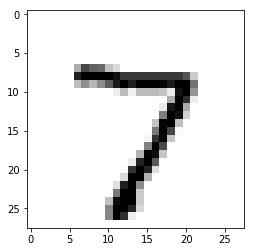

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(image, cmap='gray')


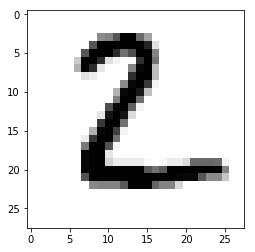

In [5]:
plt.imshow(image2, cmap='gray')

#### Read Label


In [6]:
# read labels from file
with gzip.open('data/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    labels = f.read()
    
# Display Label as bytes    
print("Display Label as bytes   : ",labels[8:9])

# Desplay  Label as int
print("Display Label as Integer : ",int.from_bytes(labels[8:9], byteorder="big"))

Display Label as bytes   :  b'\x07'
Display Label as Integer :  7


In [7]:
len(labels)


10008

In [8]:
len(file_content)

7840016

## Load all Images and Labels

In [9]:
#image = ~np.array(list(file_content[16:800])).reshape(28,28).astype(np.uint8)
# Start at index 16 as first 16 bytes are represent file
testList=[]
imageSize = 784
imageList =[]
i=16
j=8
labelList = []

while (i < len(file_content)): 
   
    imageList.append(~np.array(list(file_content[i:i+imageSize])).reshape(28,28).astype(np.uint8))
    labelList.append(int.from_bytes(labels[j:j+1], byteorder="big"))
    
    i += imageSize
    j=j+1
    
testList.append(imageList)
testList.append(labelList)

print(imageList[1])
print(labelList[1])
print(len(imageList)," ",len(labelList))

counter = 0
i = 0

for i in range(5):
    print("=TEST==>",testList[0][i],"==LAB==", testList[1][i])


[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 139 130  84   0   0 105 162 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255  86   2   2   2   2   2   2  37 225
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255  86   2   2   2  42 113  79   2   2 133
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 203   5   2  45 223 243 255 249  49   2 115
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 178   4  45 230 255 255 255 133   7   2 190
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 224 237 255 255 255 255  46   

## Refernces

- [Info on MNIST dataset](http://yann.lecun.com/exdb/mnist/)